## 1. 모집단 가정(원래는 알 수 없음)
### 1) 연속형 데이터

In [1]:
# 데이터 생성
set.seed(1234)
x = round(runif(500, -3, 3), 3)
e = round(rnorm(500, 0, 2), 3)
y = 0.3 - 2 * x - 0.1 * x ^ 2 + x ^ 3 + e
data = data.frame(x, y)

In [2]:
# test 데이터 생성
test_x = round(runif(200, -3, 3), 3)
test_e = round(rnorm(200, 0, 2), 3)
test_y = 0.3 - 2 * test_x - 0.1 * test_x^2 + test_x^3 + test_e
test = data.frame(x = test_x, y = test_y)

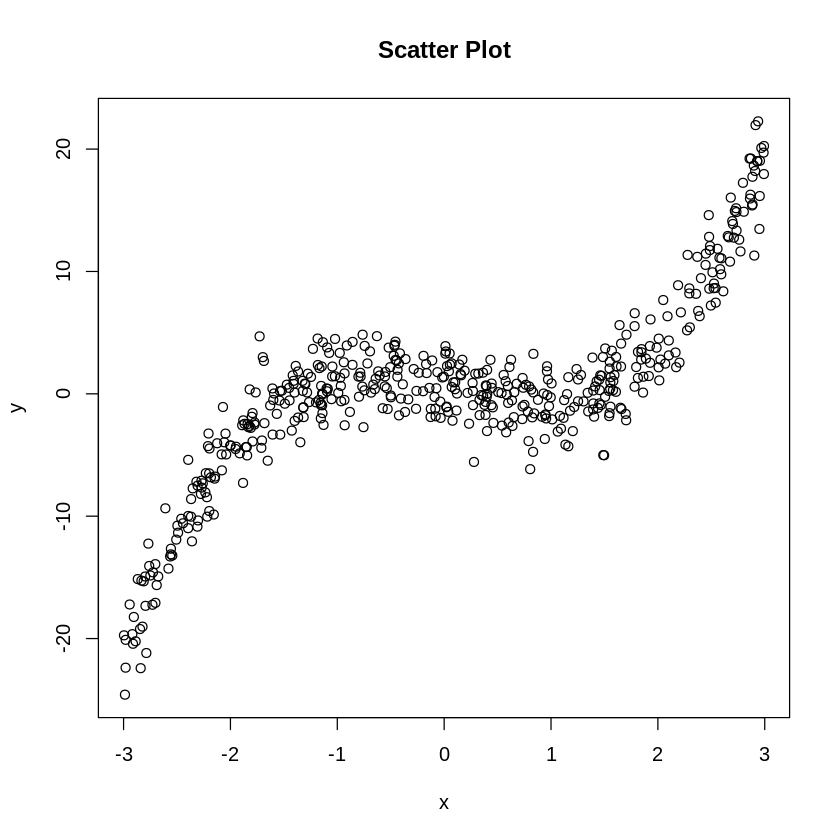

In [3]:
# plot
plot(x, y, main = 'Scatter Plot')

In [4]:
# training & validation data 분할
install.packages("caret")
library(caret)
ind_train = createDataPartition(y = data$y, p = 0.75, list = FALSE)
training = data[ind_train, ]   # training data
val = data[-ind_train, ]       # validation data

nrow(training)  # training 376개
nrow(val)       # validation 124개

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



[1] 376

[1] 124

In [13]:
# model 적합 : 선형회귀
# 1차항
model1 = lm(y ~ x, data =training)
summary(model1)
beta1 = model1$coefficients  # model1의 회귀계수 beta1


Call:
lm(formula = y ~ x, data = training)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5301  -3.2740   0.2186   3.3301  12.1484 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.1160     0.2337   0.496     0.62    
x             3.4056     0.1370  24.855   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.532 on 374 degrees of freedom
Multiple R-squared:  0.6229,	Adjusted R-squared:  0.6219 
F-statistic: 617.8 on 1 and 374 DF,  p-value: < 2.2e-16


In [14]:
# 2차항
model2 = lm(y ~ x + I(x^2), data = training)
summary(model2)
beta2 = model2$coefficients  # model2의 회귀계수 beta2


Call:
lm(formula = y ~ x + I(x^2), data = training)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9121  -3.3845   0.1912   3.3800  12.7088 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.40821    0.34371   1.188    0.236    
x            3.41044    0.13702  24.891   <2e-16 ***
I(x^2)      -0.10041    0.08662  -1.159    0.247    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.53 on 373 degrees of freedom
Multiple R-squared:  0.6243,	Adjusted R-squared:  0.6222 
F-statistic: 309.9 on 2 and 373 DF,  p-value: < 2.2e-16


In [15]:
# 3차항
model3 = lm(y ~ x + I(x^2) + I(x^3), data = training)
summary(model3)
beta3 = model3$coefficients  # model3의 회귀계수 beta3


Call:
lm(formula = y ~ x + I(x^2) + I(x^3), data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5860 -1.3943  0.0347  1.1350  6.5215 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.48180    0.14907   3.232  0.00134 ** 
x           -1.87897    0.14455 -12.998  < 2e-16 ***
I(x^2)      -0.17233    0.03761  -4.582  6.3e-06 ***
I(x^3)       0.97797    0.02436  40.139  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.965 on 372 degrees of freedom
Multiple R-squared:  0.9295,	Adjusted R-squared:  0.929 
F-statistic:  1635 on 3 and 372 DF,  p-value: < 2.2e-16


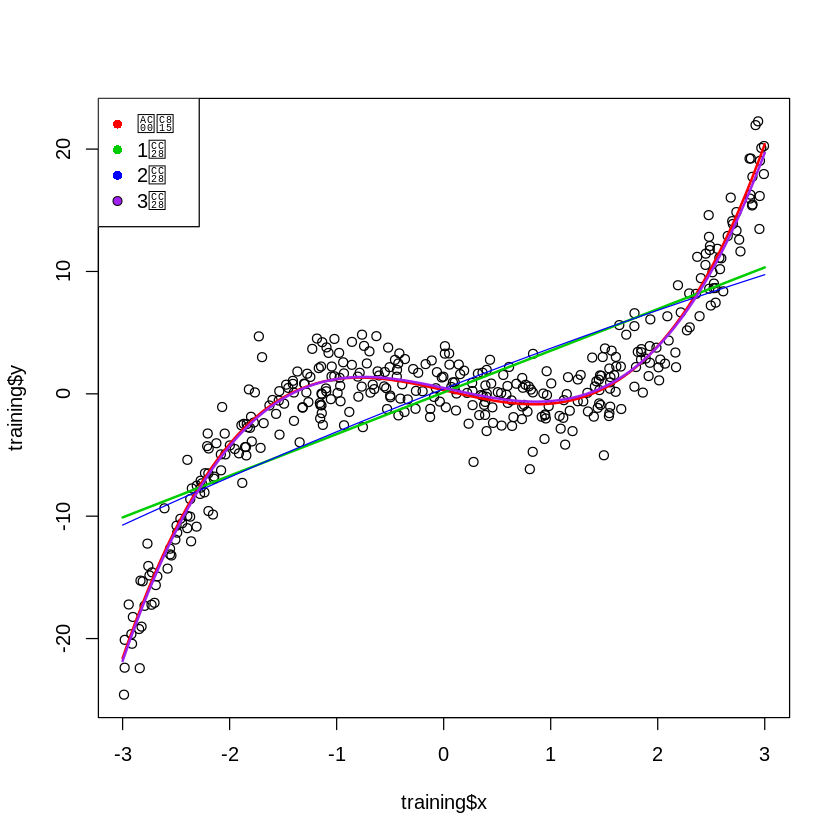

In [8]:
# 적합된 모형들의 plot
plot(training$x, training$y)
curve(0.3 - 2 * x - 0.1 * x^2 + x^3, from = -3, to = 3, add = T, col = "red", lwd = 2)
curve(beta1[1] + beta1[2] * x, from = -3, to = 3, add = T, col = "green3", lwd = 2)
curve(beta2[1] + beta2[2] * x + beta2[3] * x^2, from = -3, to = 3, add = T, col = 'blue', lwd = 1)
curve(beta3[1] + beta3[2] * x + beta3[3] * x^2 + beta3[4] * x^3, from = -3, to = 3, add = T, col = 'purple', lwd = 2)
legend("topleft", pch = 16, legend = c("가정", "1차", "2차", "3차"), col = c("red", "green3", "blue", "purple"))

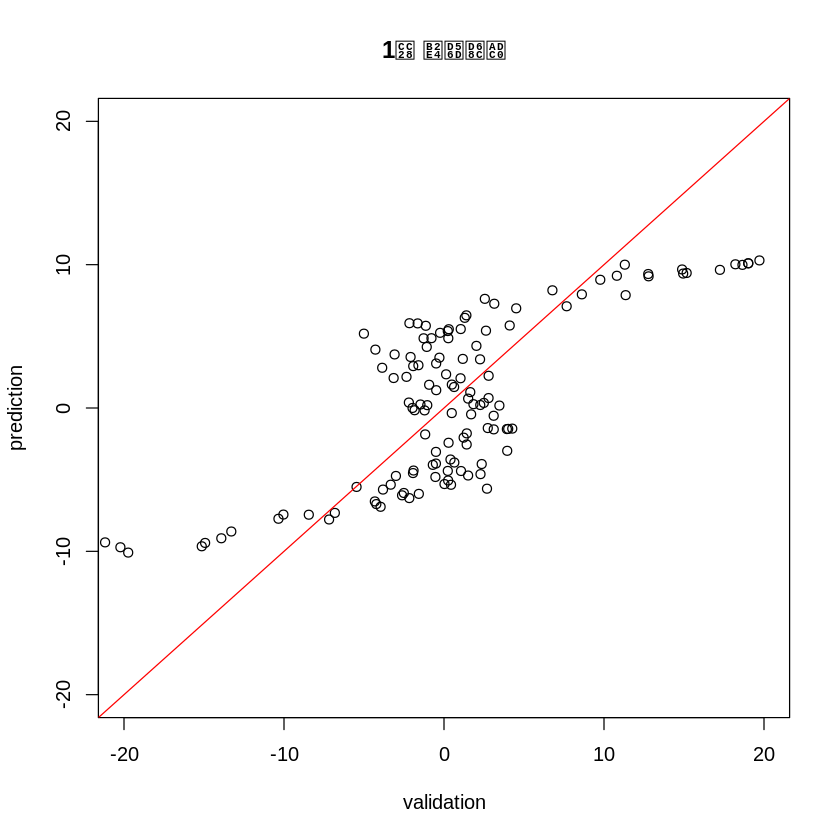

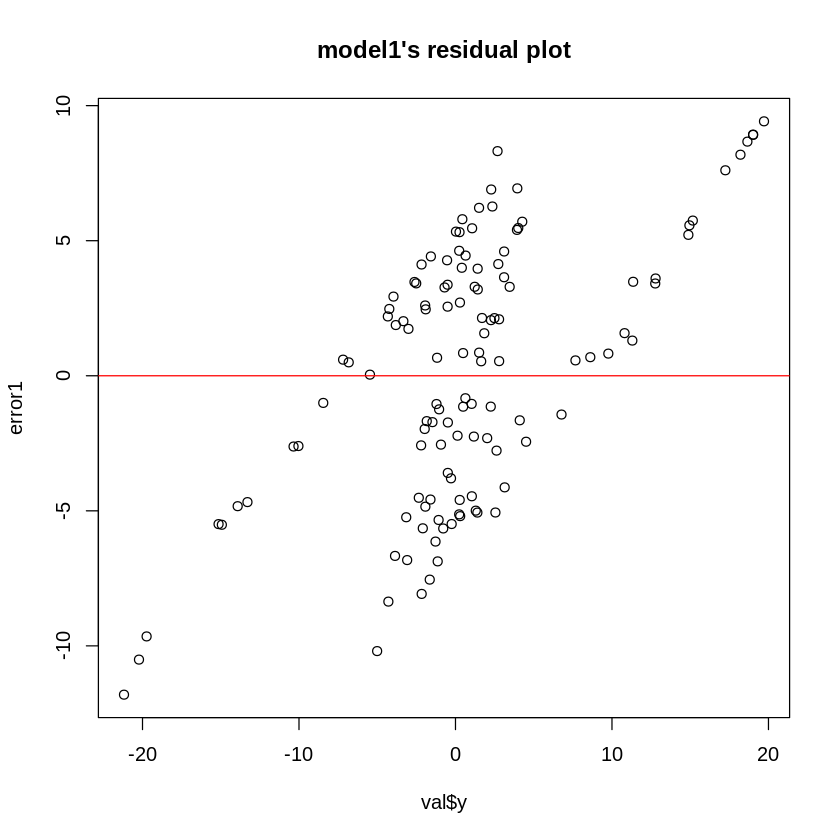

In [9]:
# 예측
# model1
pred1 = predict(model1, newdata = val)
plot(val$y, pred1, xlim = c(-20, 20), ylim = c(-20, 20), ylab = "prediction", xlab = "validation", main = '1차 다항회귀')
abline(a = 0, b = 1, col = "red")
error1 = val$y - pred1
plot(val$y, error1, main = "model1's residual plot")
abline(a = 0, b = 0, col = "red")

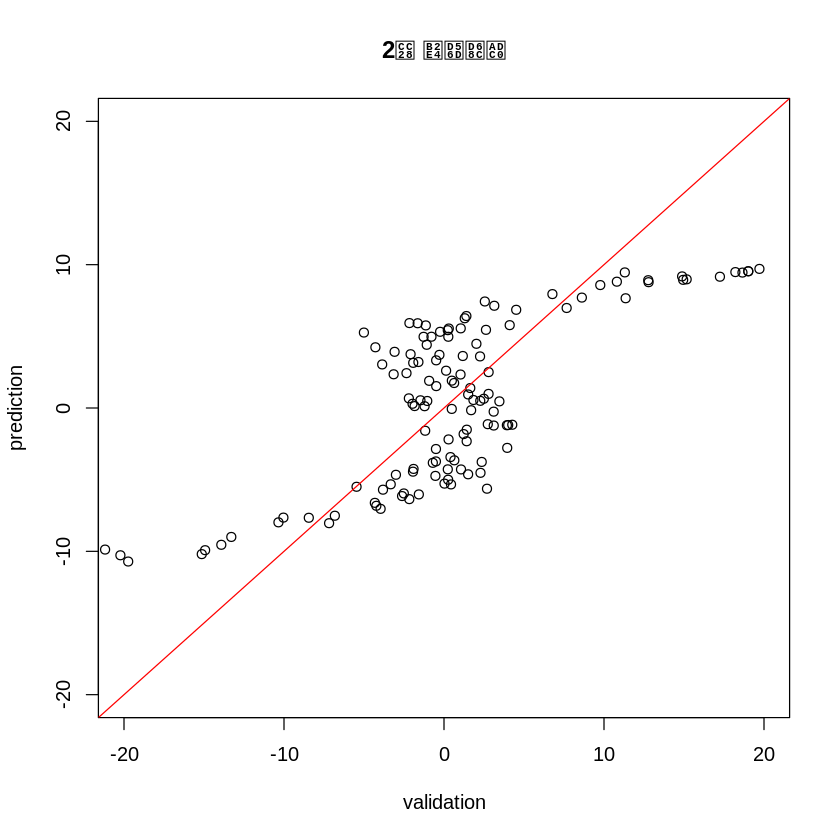

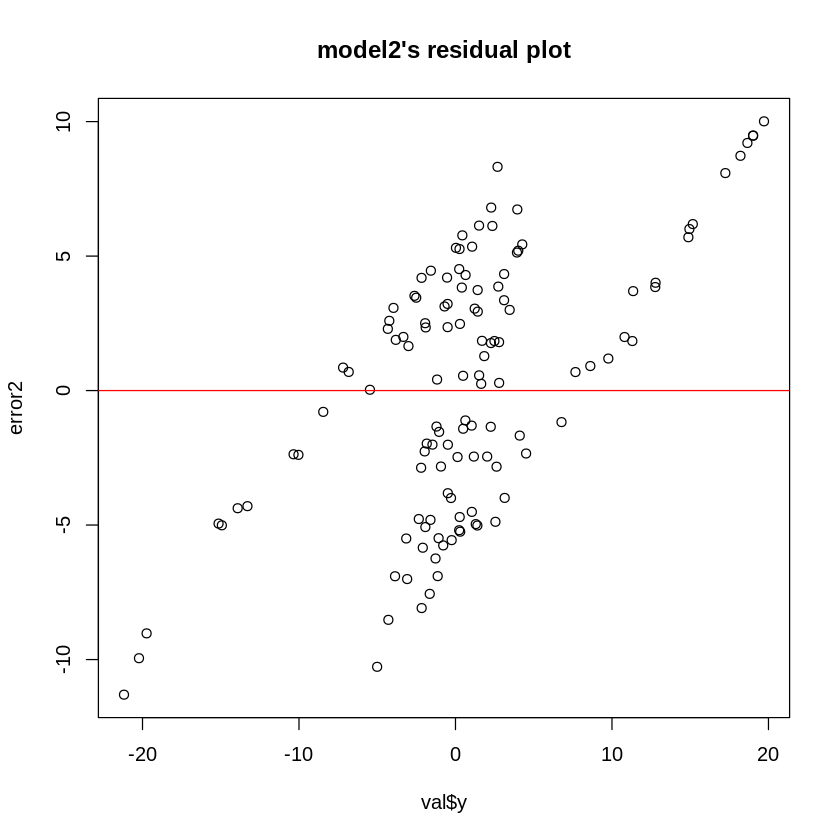

In [10]:
# model2
pred2 = predict(model2, newdata = val)
plot(val$y, pred2, xlim = c(-20, 20), ylim = c(-20, 20), ylab = "prediction", xlab = "validation", main = '2차 다항회귀')
abline(a = 0, b = 1, col = "red")
error2 = val$y - pred2
plot(val$y, error2, main = "model2's residual plot")
abline(a = 0, b = 0, col = "red")

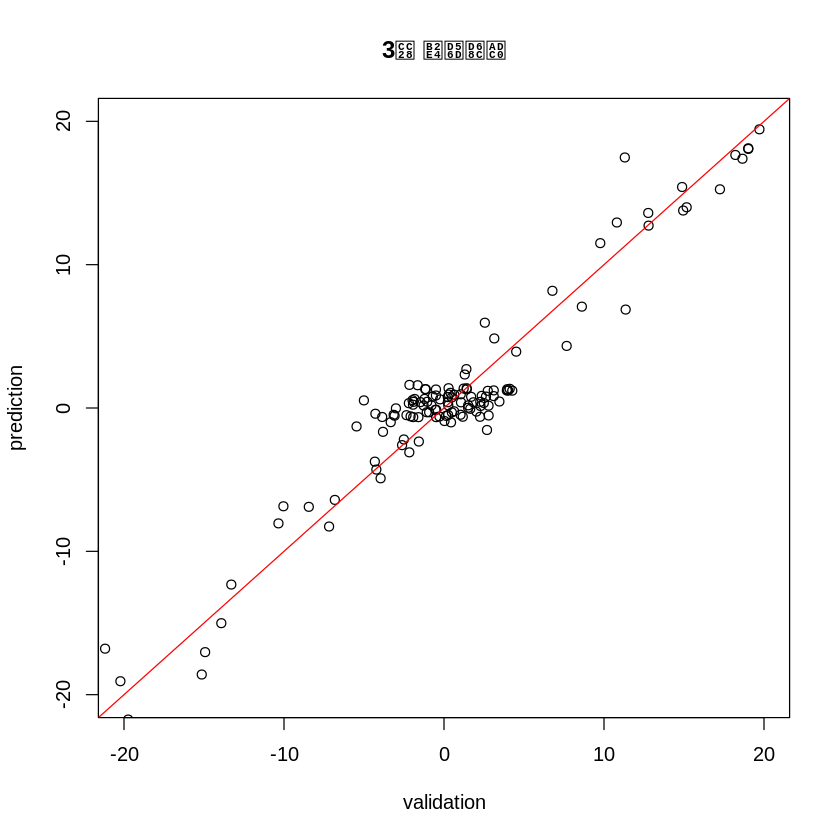

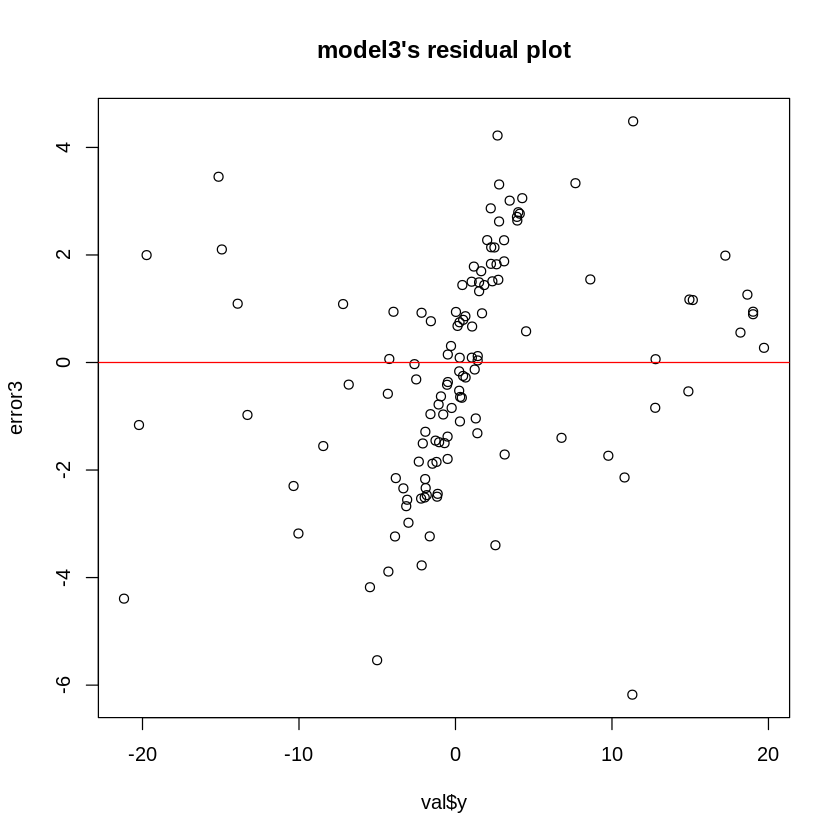

In [11]:
# model3
pred3 = predict(model3, newdata = val)
plot(val$y, pred3, xlim = c(-20, 20), ylim = c(-20, 20), ylab = "prediction", xlab = "validation", main = '3차 다항회귀')
abline(a = 0, b = 1, col = "red")
error3 = val$y - pred3
plot(val$y, error3, main = "model3's residual plot")
abline(a = 0, b = 0, col = "red")

In [12]:
# 평가기준 : accuracy{forecast}
install.packages("forecast")
library(forecast)
accuracy(pred1, val$y)
accuracy(pred2, val$y)
accuracy(pred3, val$y)  # 3차항의 모형으로 채택

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



,ME,RMSE,MAE,MPE,MAPE
Test set,0.1612004,4.756115,4.04023,222.4705,443.8241


,ME,RMSE,MAE,MPE,MAPE
Test set,0.1500249,4.780653,4.060773,218.8214,445.0119


,ME,RMSE,MAE,MPE,MAPE
Test set,-0.1464094,2.062571,1.681976,79.66352,111.3826


In [16]:
# test data에 적용 + 결과확인
# 3차항 모형으로 training + val data에 적합
model = lm(y ~ x + I(x^2) + I(x^3), data = data)
summary(model)


Call:
lm(formula = y ~ x + I(x^2) + I(x^3), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1037 -1.4039  0.0486  1.2260  6.5159 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.46096    0.13013   3.542 0.000434 ***
x           -1.91611    0.12592 -15.216  < 2e-16 ***
I(x^2)      -0.17784    0.03306  -5.380 1.15e-07 ***
I(x^3)       0.98211    0.02117  46.396  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.989 on 496 degrees of freedom
Multiple R-squared:  0.9275,	Adjusted R-squared:  0.927 
F-statistic:  2114 on 3 and 496 DF,  p-value: < 2.2e-16


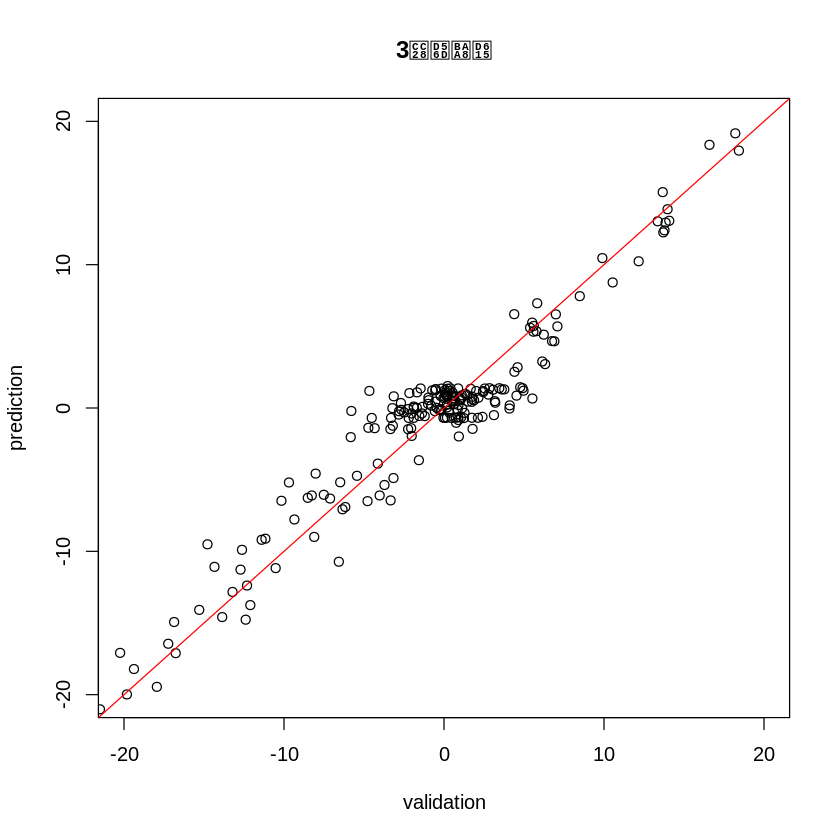

,ME,RMSE,MAE,MPE,MAPE
Test set,-0.06788447,1.975233,1.583515,26.39719,143.2858


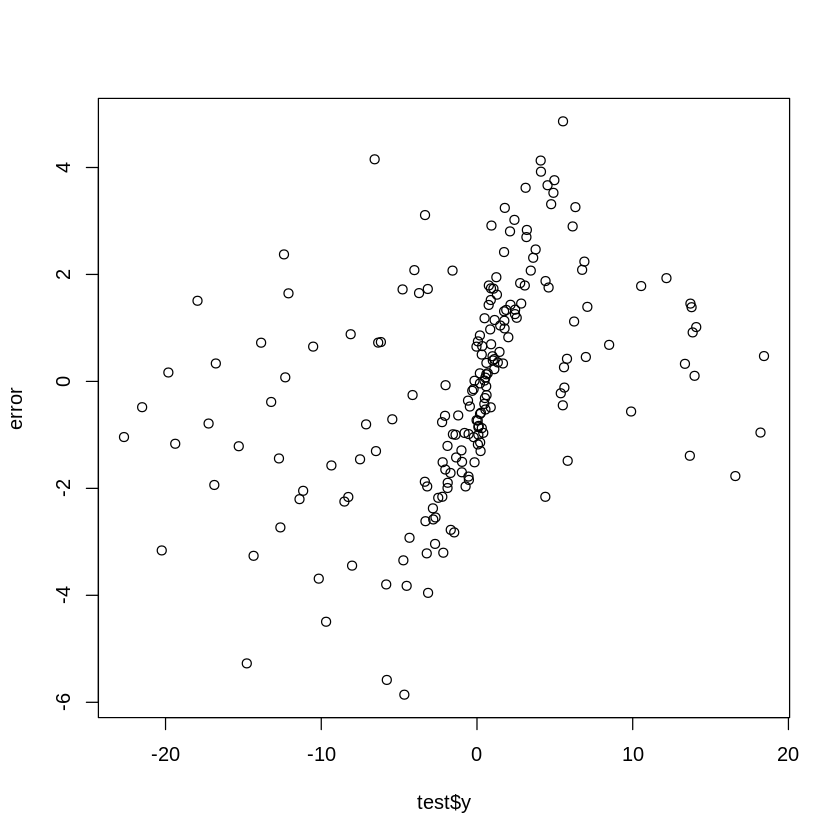

In [17]:
# 최종 3차항 모델로 예측
pred = predict(model, newdata = test)
plot(test$y, pred, xlim = c(-20, 20), ylim = c(-20, 20), ylab = "prediction", xlab = "validation", main = "3차항모형")
abline(a = 0, b = 1, col = "red")
error = test$y - pred
plot(test$y, error)
accuracy(pred, test$y)

### 2) 범주형 데이터
+ csv 데이터를 colab에서 불러올 수 없었기에 코드만 첨부

In [18]:
# mydata = read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
# head(mydata)
# str(mydata)

# # 변수 factor화
# mydata$admit = as.factor(mydata$admit)
# mydata$rank = as.factor(mydata$rank)
# summary(mydata)

# # training & validation data 분할
# library(caret)
# my.ind = createDataPartition(y = mydata$admit, p = 0.75, list = FALSE)
# my.training = mydata[my.ind, ]
# my.test = mydata[-my.ind, ]

# sum(table(mydata$admit))
# nrow(my.ind)
# nrow(my.training)
# nrow(my.test)

# # logistic regression 적합
# glm.fit = glm(admit ~., data = my.training, family = "binomial")
# summary(glm.fit)

# # 예측
# glm.pred = predict(glm.fit, newdata = my.test, type = "response")
# glm.predicton = as.factor(round(glm.pred))

# # confusion matrix로 결과 비교
# confusionMatrix(my.test$admit, glm.predicton)

# # ROC curve
# library(ROCR)
# pr = prediction(glm.pred, my.test$admit)
# prf = performance(pr, measure = "tpr", x.measure = "fpr")
# plot(prf)